In [55]:

import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
import warnings

warnings. filterwarnings('ignore')
%matplotlib inline


In [56]:
df = pd.read_csv('titanic.csv')

# Data Analysis

In [57]:
df.head()


,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [58]:
df.shape

(891, 12)

In [59]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Name         891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [60]:
print(df.Sex.unique())
print(df.SibSp.unique())
print(df.Pclass.unique())
print(df.Embarked.unique())



['male' 'female']
[1 0 3 4 2 5 8]
[3 1 2]
['S' 'C' 'Q' nan]


In [61]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [62]:
df.dtypes

PassengerId      int64
Name            object
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Survived         int64
dtype: object

In [63]:
df.isnull().any()

PassengerId    False
Name           False
Pclass         False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
Survived       False
dtype: bool

In [64]:
df.duplicated().any()

False

In [65]:
total_nulls = df.isnull().sum().sort_values(ascending=False)

percent_null =  round ( (total_nulls/ df.shape[0] )*100 , 2 )

missing_data = pd.concat([total_nulls, percent_null], axis=1, keys=['Total', 'Null %'])

missing_data.head(5)

,Total,Null %
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
PassengerId,0,0.00
Name,0,0.00


# fill null values

In [66]:
df.Embarked = df.Embarked.fillna(df.Embarked.mode())

In [67]:
df.Age = df.Age.fillna(df.Age.mean())

# Data Visualization

1. Age and Sex

Text(0.5, 1.0, 'Male')

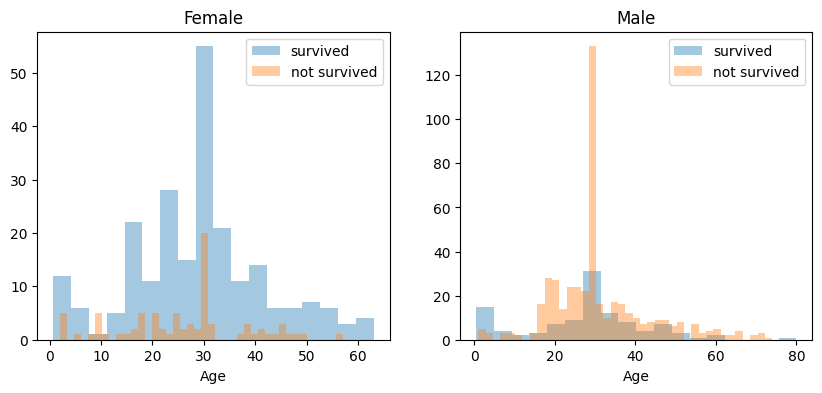

In [68]:
survived = 'survived'
not_survived = 'not survived'

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))

women = df[df['Sex']=='female']
men = df[df['Sex']=='male']

ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')

ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male')

<Axes: xlabel='Pclass', ylabel='Survived'>

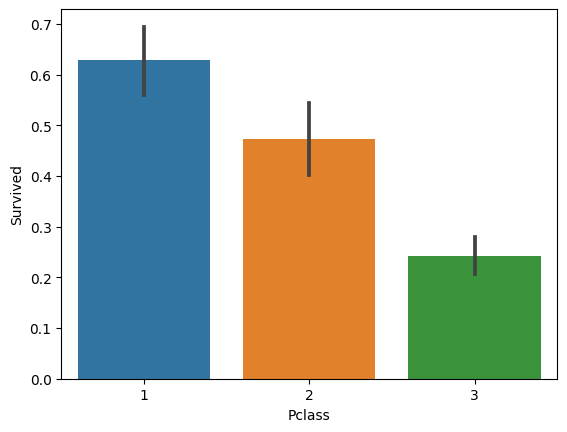

In [69]:
sns.barplot(x='Pclass', y='Survived', data=df)

<Axes: xlabel='Embarked', ylabel='Survived'>

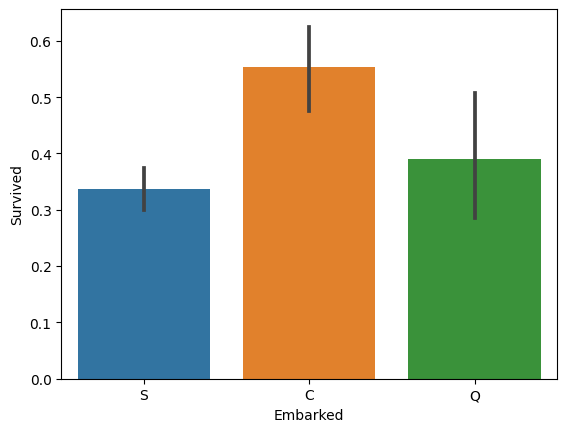

In [70]:
sns.barplot(x='Embarked', y='Survived', data=df)


<Axes: xlabel='Sex', ylabel='Survived'>

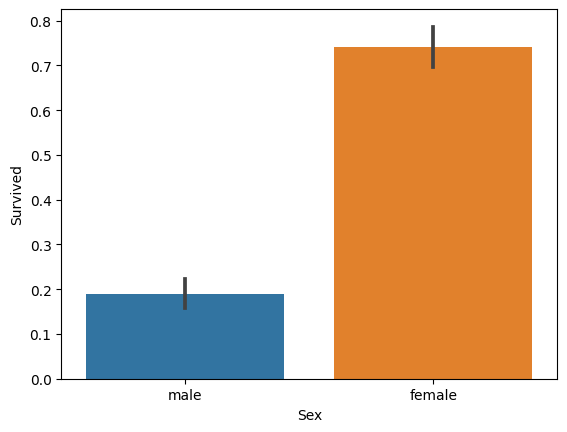

In [71]:
sns.barplot(x='Sex', y='Survived', data=df)


Text(0, 0.5, 'Fare')

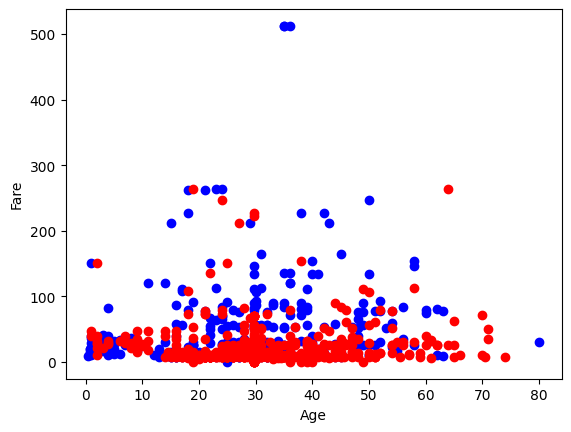

In [72]:
df_survived = df[df['Survived'] == 1]
df_notsurvived = df[df['Survived'] == 0]

plt.scatter( df_survived.Age , df_survived.Fare , color = 'blue')
plt.scatter( df_notsurvived.Age , df_notsurvived.Fare , color = 'red')

plt.xlabel('Age')
plt.ylabel('Fare')

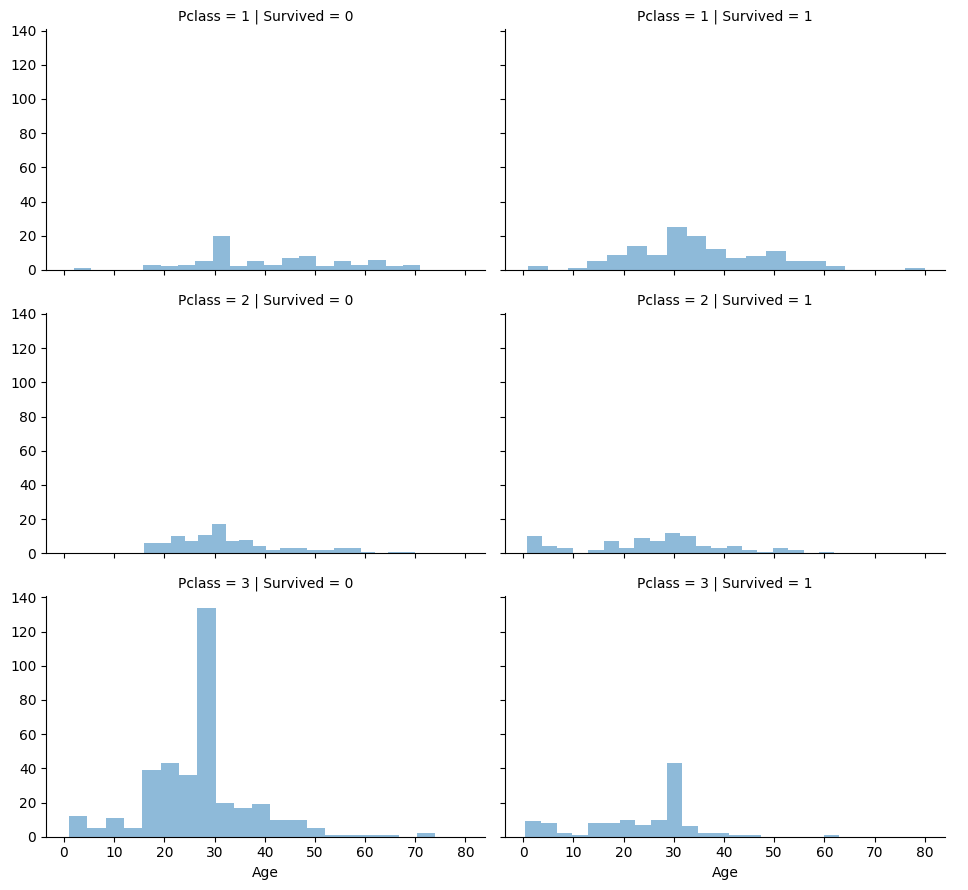

In [73]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

# Data Cleaning And Preprocession

In [74]:
df = df.drop( ['Name' , 'PassengerId' , 'Cabin' , 'Ticket'   , 'SibSp' , 'Parch'] , axis='columns')
df.head()

,Pclass,Sex,Age,Fare,Embarked,Survived
0,3,male,22.0,7.2500,S,0
1,1,female,38.0,71.2833,C,1
2,3,female,26.0,7.9250,S,1
3,1,female,35.0,53.1000,S,1
4,3,male,35.0,8.0500,S,0


In [75]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder

def handleOrdinalEncoding(col, custom_categories):
    label_encoder = LabelEncoder()
    label_encoder.fit(custom_categories)
    encoded_data =label_encoder.fit_transform(df[col] )
    return encoded_data
    
def handleNominalEncoding(col):
    dummies = pd.get_dummies(df[col] , prefix=col + "_" )
    dummies_drop_one_col = dummies.columns.tolist()[0] 
    merged = pd.concat([df , dummies] , axis='columns')
    return merged.drop([col , dummies_drop_one_col] , axis = 'columns')

In [76]:
df= handleNominalEncoding('Sex')
df= handleNominalEncoding('Embarked')
df.head()

,Pclass,Age,Fare,Survived,Sex__male,Embarked__Q,Embarked__S
0,3,22.0,7.2500,0,True,False,True
1,1,38.0,71.2833,1,False,False,False
2,3,26.0,7.9250,1,False,False,True
3,1,35.0,53.1000,1,False,False,True
4,3,35.0,8.0500,0,True,False,True


In [77]:
from sklearn.preprocessing import  MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(df[['Age' , 'Fare']])
df[['Age' , 'Fare']] = scaler.transform(df[['Age' , 'Fare']]) 
df.head()


,Pclass,Age,Fare,Survived,Sex__male,Embarked__Q,Embarked__S
0,3,0.271174,0.014151,0,True,False,True
1,1,0.472229,0.139136,1,False,False,False
2,3,0.321438,0.015469,1,False,False,True
3,1,0.434531,0.103644,1,False,False,True
4,3,0.434531,0.015713,0,True,False,True


In [78]:
df.describe()

,Pclass,Age,Fare,Survived
count,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.367921,0.062858,0.383838
std,0.836071,0.163383,0.096995,0.486592
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,0.271174,0.015440,0.000000
50%,3.000000,0.367921,0.028213,0.000000
75%,3.000000,0.434531,0.060508,1.000000
max,3.000000,1.000000,1.000000,1.000000


# Split data into training and testing sets

In [81]:
from sklearn.model_selection import  train_test_split


In [83]:
features = df.drop('Survived' , axis='columns')
target = df['Survived']

x_train , x_test , y_train , y_test = train_test_split(features , target , test_size=0.3, random_state=42)


In [84]:
x_train.head()

,Pclass,Age,Fare,Sex__male,Embarked__Q,Embarked__S
445,1,0.044986,0.159777,True,False,True
650,3,0.367921,0.015412,True,False,True
172,3,0.007288,0.021731,False,False,True
450,2,0.447097,0.054164,True,False,True
314,2,0.535059,0.051237,True,False,True


# Classification with Naive Bayes Classifier

In [85]:
from sklearn.naive_bayes import  GaussianNB

In [86]:
dt = GaussianNB()
dt.fit(x_train , y_train)
dt.score(x_test , y_test)

0.7835820895522388

Confusion Matrix:
[[131  26]
 [ 32  79]]
F1 Score: 0.7826052031509121
Precision Score: 0.7824335814355043
Recall Score: 0.7835820895522388


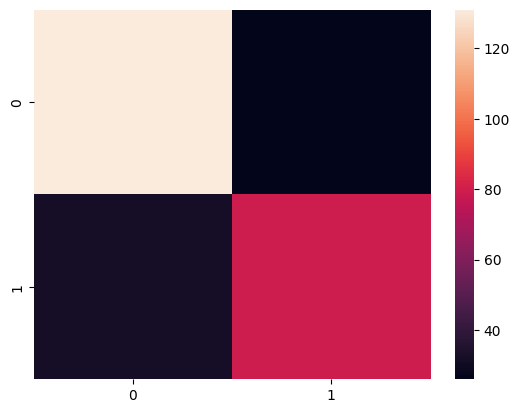

In [91]:
y_pred = dt.predict(x_test)
model_evaluation(y_pred , y_test)

# Evaluate the Model

In [89]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

In [90]:
def model_evaluation(pred , actual):
    cm = confusion_matrix(actual , pred)
    print("Confusion Matrix:")
    print(cm)
    sns.heatmap(cm)

    # Calculate the F1 score
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("F1 Score:", f1)

    # Calculate the precision score
    precision = precision_score(y_test, y_pred, average='weighted')
    print("Precision Score:", precision)

    # Calculate the recall score
    recall = recall_score(y_test, y_pred, average='weighted')
    print("Recall Score:", recall)


In [93]:
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(),x_train, y_train, cv=5)

array([0.76      , 0.872     , 0.704     , 0.73387097, 0.80645161])